In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn import cross_validation
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

[ 0.82831803  0.62923959 -0.09321231  0.77451845  0.89423929]
Accuracy: 0.61 (+/- 0.18)
Training MSE: 43572331.148
Test MSE: 52225756.509


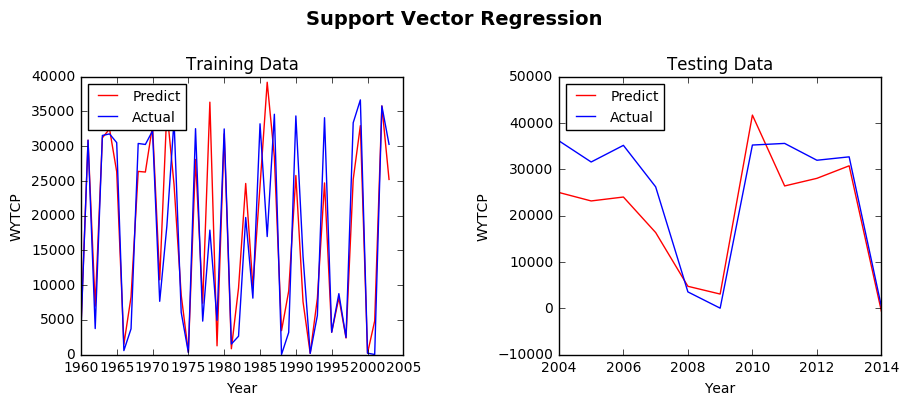

In [3]:
# Read data
data = pd.read_csv("../../Clean-Energy-Outlook/Data/data of states/CA.csv")
year1 = data[['Year']][:44]
year2 = data[['Year']][44:55]

# Data Preprocessing
data['GDP_scaled']=preprocessing.scale(data['GDP'])
data['CLPRB_scaled']=preprocessing.scale(data['CLPRB'])
data['EMFDB_scaled']=preprocessing.scale(data['EMFDB'])
data['ENPRP_scaled']=preprocessing.scale(data['ENPRP'])
data['NGMPB_scaled']=preprocessing.scale(data['NGMPB'])
data['PAPRB_scaled']=preprocessing.scale(data['PAPRB'])
data['PCP_scaled']=preprocessing.scale(data['PCP'])
data['ZNDX_scaled']=preprocessing.scale(data['ZNDX'])
data['OP_scaled']=preprocessing.scale(data['Nominal Price'])
data['OP2_scaled']=preprocessing.scale(data['Inflation Adjusted Price'])

# Split data for train and test
all_x = data[['GDP_scaled','CLPRB_scaled','EMFDB_scaled','ENPRP_scaled','NGMPB_scaled','PAPRB_scaled','PCP_scaled','ZNDX_scaled','OP_scaled', 'OP2_scaled']][:55]
all_y = data[['WYTCP']][:55]
X_train, X_test, y_train, y_test = cross_validation.train_test_split(all_x, all_y, test_size=0.2, random_state=0)

# SVR for wind in CA with cross-validation
clf = SVR(kernel='linear', C=1000.0, epsilon=0.3)
model = clf.fit(X_train, y_train)
scores = cross_validation.cross_val_score(clf, X_train, y_train, cv=5)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() / 2))

train_error = mean_squared_error(y_train, clf.predict(X_train))
print('Training MSE: %.3f' % train_error)
test_error = mean_squared_error(y_test, clf.predict(X_test))
print('Test MSE: %.3f' % test_error)

# Plots
fig = plt.figure(figsize=(10,4.5))
fig.suptitle('Support Vector Regression', fontsize=14, fontweight='bold')

# Plot for training data
fig.add_subplot(121)
plt.plot(year1, clf.predict(X_train), color='red', label='Predict')
plt.plot(year1, y_train, label='Actual')
plt.legend(loc=2,fontsize=10)
plt.title('Training Data')
plt.xlabel('Year')
plt.ylabel('WYTCP')

# Plot for test data
fig.add_subplot(122)
plt.plot(year2, clf.predict(X_test), color='red', label='Predict')
plt.plot(year2, y_test, label='Actual')
plt.legend(loc=2,fontsize=10)
plt.title('Testing Data')
plt.xlabel('Year')
plt.ylabel('WYTCP')

plt.tight_layout(pad=4, w_pad=4)
plt.show()

In [4]:
# predict Solar for future
year3 = data[['Year']][-6:]
year3 = year3.set_index([[0, 1, 2, 3, 4, 5]])
future_x = data[['GDP_scaled','CLPRB_scaled','EMFDB_scaled','ENPRP_scaled','NGMPB_scaled','PAPRB_scaled','PCP_scaled','ZNDX_scaled','OP_scaled','OP2_scaled']][-6:]
pred = pd.DataFrame(clf.predict(future_x))
pred.columns = ['WYTCP']
future = pd.concat([year3, pred], axis=1)
print(future)

     Year         WYTCP
0  2015.0  44482.033849
1  2016.0  45049.048874
2  2017.0  45578.488355
3  2018.0  46086.687551
4  2019.0  46558.522186
5  2020.0  47035.518202


In [5]:
statelist=["AK","AL","AR","AZ","CA","CO","CT","DE","FL","GA","IA","ID","IL","IN","KS","KY","LA","MA","MD","ME","MI","MN","MO","MS","MT","NC","ND","NE","NH","NJ","NM","NV","NY","OH","OK","OR","PA","RI","SC","SD","TN","TX","UT","VA","VT","WA","WI","WV","WY"]
result = year3

for i in range(49):
    data = pd.read_csv('../../Clean-Energy-Outlook/Data/data of states/%s.csv' % (statelist[i]))
    
    year1 = data[['Year']][:44]
    year2 = data[['Year']][44:55]

    # Data Preprocessing
    data['GDP_scaled']=preprocessing.scale(data['GDP'])
    data['CLPRB_scaled']=preprocessing.scale(data['CLPRB'])
    data['EMFDB_scaled']=preprocessing.scale(data['EMFDB'])
    data['ENPRP_scaled']=preprocessing.scale(data['ENPRP'])
    data['NGMPB_scaled']=preprocessing.scale(data['NGMPB'])
    data['PAPRB_scaled']=preprocessing.scale(data['PAPRB'])
    data['PCP_scaled']=preprocessing.scale(data['PCP'])
    data['ZNDX_scaled']=preprocessing.scale(data['ZNDX'])
    data['OP_scaled']=preprocessing.scale(data['Nominal Price'])
    data['OP2_scaled']=preprocessing.scale(data['Inflation Adjusted Price'])

    # Split data for train and test
    all_x = data[['GDP_scaled','CLPRB_scaled','EMFDB_scaled','ENPRP_scaled','NGMPB_scaled','PAPRB_scaled','PCP_scaled','ZNDX_scaled','OP_scaled', 'OP2_scaled']][:55]
    all_y = data[['WYTCP']][:55]
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(all_x, all_y, test_size=0.2, random_state=0)

    # SVR for hydro in CA
    clf = SVR(kernel='linear', C=1000.0, epsilon=0.3)
    model = clf.fit(X_train, y_train)
    scores = cross_validation.cross_val_score(clf, X_train, y_train, cv=5)
    print(scores)
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() / 2))
    
    future_x = data[['GDP_scaled','CLPRB_scaled','EMFDB_scaled','ENPRP_scaled','NGMPB_scaled','PAPRB_scaled','PCP_scaled','ZNDX_scaled','OP_scaled','OP2_scaled']][-6:]
    pred = pd.DataFrame(clf.predict(future_x))
    pred.columns = [statelist[i]]
    result = pd.concat([result, pred], axis=1)

print(result)

# output to csv
result.to_csv('Wind_Pred_SVR.csv', encoding='utf-8', index=False)

/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/preprocessing/data.py:177: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array 

[ 1.  1.  1.  1.  1.]
Accuracy: 1.00 (+/- 0.00)
[ 0.88842076  0.8227203   0.93962712  0.84216338  0.96910864]
Accuracy: 0.89 (+/- 0.03)
[ 0.77564875  0.83954983  0.53758184  0.82688407  0.87111959]
Accuracy: 0.77 (+/- 0.06)
[ 0.84059256  0.83745211  0.94778493  0.85559173  0.9821152 ]
Accuracy: 0.89 (+/- 0.03)
[ 0.82831803  0.62923959 -0.09321231  0.77451845  0.89423929]
Accuracy: 0.61 (+/- 0.18)


/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

[ 0.01497067 -0.04887788  0.55992361  0.23761879 -1.40243267]
Accuracy: -0.13 (+/- 0.34)
[ 0.15216688 -0.35082055  0.47688508  0.15552222  0.69950037]
Accuracy: 0.23 (+/- 0.18)
[ 1.  1.  1.  1.  1.]
Accuracy: 1.00 (+/- 0.00)
[ 0.3402565   0.07689219  0.57852631  0.53018708  0.54206971]
Accuracy: 0.41 (+/- 0.09)


/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

[ 0.62368275  0.49632204  0.87301612  0.74919691  0.91211111]
Accuracy: 0.73 (+/- 0.08)
[ 0.86600344  0.74380067  0.86939633  0.95552378  0.96431694]
Accuracy: 0.88 (+/- 0.04)
[ 1.  1.  1.  1.  1.]
Accuracy: 1.00 (+/- 0.00)
[ 0.7269066   0.70102539  0.9001734   0.8667657   0.9106437 ]
Accuracy: 0.82 (+/- 0.04)
[ 1.  1.  1.  1.  1.]
Accuracy: 1.00 (+/- 0.00)


/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

[ 0.803745    0.80679547  0.77733468  0.79568161  0.96649989]
Accuracy: 0.83 (+/- 0.03)
[ 1.  1.  1.  1.  1.]
Accuracy: 1.00 (+/- 0.00)
[ 0.97081752  0.97237202  0.98285484  0.9692346   0.97819678]
Accuracy: 0.97 (+/- 0.00)


/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

[ 0.50638594  0.31042776 -0.15743868  0.63872572  0.73322172]
Accuracy: 0.41 (+/- 0.16)
[ 0.80360131  0.67837309  0.83816592  0.89881082  0.90621776]
Accuracy: 0.83 (+/- 0.04)
[-0.27994405 -0.31501018  0.53710855  0.34062363 -0.09161032]
Accuracy: 0.04 (+/- 0.17)


/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

[ 0.80829506  0.81250529  0.96987329  0.78040061  0.89194844]
Accuracy: 0.85 (+/- 0.03)
[ 0.36516902 -0.62781755  0.41368172  0.39574273  0.35083563]
Accuracy: 0.18 (+/- 0.20)
[ 0.5701378   0.76819416  0.65498425 -0.47246301  0.94997332]
Accuracy: 0.49 (+/- 0.25)


/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

[ 0.79670411  0.85918752  0.94327873  0.92830174  0.97404171]
Accuracy: 0.90 (+/- 0.03)
[ 1.  1.  1.  1.  1.]
Accuracy: 1.00 (+/- 0.00)
[ 0.39388789  0.57765878  0.86012166  0.68631167  0.86396508]
Accuracy: 0.68 (+/- 0.09)
[ 1.  1.  1.  1.  1.]
Accuracy: 1.00 (+/- 0.00)


/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

[ 0.72493299  0.58301501  0.27806944  0.53610409  0.7257509 ]
Accuracy: 0.57 (+/- 0.08)
[ 0.68773319  0.82132435  0.96700386  0.85739617  0.95983301]
Accuracy: 0.86 (+/- 0.05)
[ 0.5194831   0.80032368  0.89684543  0.76145385  0.87110459]
Accuracy: 0.77 (+/- 0.07)


/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

[ 1.  1.  1.  1.  1.]
Accuracy: 1.00 (+/- 0.00)
[ 1.  1.  1.  1.  1.]
Accuracy: 1.00 (+/- 0.00)
[ 0.93741767  0.88088118  0.87750301  0.88979281  0.93490426]
Accuracy: 0.90 (+/- 0.01)
[ 0.85405088  0.92462     0.90686009  0.84505703  0.91776199]
Accuracy: 0.89 (+/- 0.02)


/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

[ 1.  1.  1.  1.  1.]
Accuracy: 1.00 (+/- 0.00)
[ 0.67043193  0.21677811  0.7184593   0.86117017  0.95026606]
Accuracy: 0.68 (+/- 0.13)
[ 0.90496579  0.83211661  0.89012496  0.75956133  0.90524534]
Accuracy: 0.86 (+/- 0.03)


/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

[ 1.  1.  1.  1.  1.]
Accuracy: 1.00 (+/- 0.00)
[ 0.6185224   0.55236938  0.80533637  0.67459831  0.74721092]
Accuracy: 0.68 (+/- 0.04)


/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

[-0.12723266  0.         -0.52122592 -0.15270685  0.        ]
Accuracy: -0.16 (+/- 0.10)
[ 0.70514051  0.8882593   0.92360455  0.71048242  0.83284541]
Accuracy: 0.81 (+/- 0.04)
[ 0.55649667  0.90658288  0.94629227  0.84987328  0.8811793 ]
Accuracy: 0.83 (+/- 0.07)
[ 1.  1.  1.  1.  1.]
Accuracy: 1.00 (+/- 0.00)


/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

[ 0.82271794  0.70562337  0.8726895   0.70050314  0.826243  ]
Accuracy: 0.79 (+/- 0.03)
[ 0.4304196   0.58382026  0.8502693   0.57458712  0.74266262]
Accuracy: 0.64 (+/- 0.07)
[ 0.35999328  0.7203814   0.71584281  0.77388204  0.60774335]
Accuracy: 0.64 (+/- 0.07)


/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

[ 0.51447775 -0.16354599  0.54248211  0.40695143  0.31458271]
Accuracy: 0.32 (+/- 0.13)
[ 1.  1.  1.  1.  1.]
Accuracy: 1.00 (+/- 0.00)
[ 1.  1.  1.  1.  1.]
Accuracy: 1.00 (+/- 0.00)
     Year   AK            AL            AR            AZ            CA  \
0  2015.0  0.0  33145.095178  16197.986141  35358.117502  44482.033849   
1  2016.0  0.0  34603.827372  15308.808621  37362.514212  45049.048874   
2  2017.0  0.0  35229.757708  14781.876225  39139.873538  45578.488355   
3  2018.0  0.0  35924.440787  13014.882936  40652.534495  46086.687551   
4  2019.0  0.0  36936.826078  10879.260649  42679.289534  46558.522186   
5  2020.0  0.0  37983.872967   7732.116785  44240.984639  47035.518202   

          CO            CT   DE            FL ...         SD            TN  \
0  -7.149468  13337.379470  0.0  27828.478840 ...   0.118207  25535.612227   
1  -8.896065  13567.521374  0.0  27684.067288 ...   0.234525  24467.862407   
2  -2.222137  15353.294828  0.0  28511.655956 ...   0.476657  2